In [1]:
import matplotlib.pyplot as plt
from skimage.filters import frangi, hessian
import nibabel as nib
import numpy as np

### Load T2 & ROI nifti files

In [2]:
fn_t2 = '../data/3D_T2.nii.gz'
fn_roi = '../data/wm.nii.gz'

t2 = nib.load(fn_t2)
roi = nib.load(fn_roi)

t2d = t2.get_fdata()
roid = roi.get_fdata()
print(t2d.shape, roid.shape)

(260, 311, 260) (260, 311, 260)


### Frangi filtering 

In [3]:
pvsd = frangi(t2d, scale_range=(1, 2), scale_step=1, black_ridges=False)  

/var/folders/n7/jq4g2jg94p31535vqfnh88b40000gn/T/ipykernel_77095/1934832328.py:1: UserWarning: Use keyword parameter `sigmas` instead of `scale_range` and `scale_range` which will be removed in version 0.17.
  pvsd = frangi(t2d, scale_range=(1, 2), scale_step=1, black_ridges=False)


### ROI masking & thresholding


In [4]:
pvs_th = 0.25
pvsd[roid==0]=0
pvsmsk = (pvsd>pvs_th).astype(np.int8)

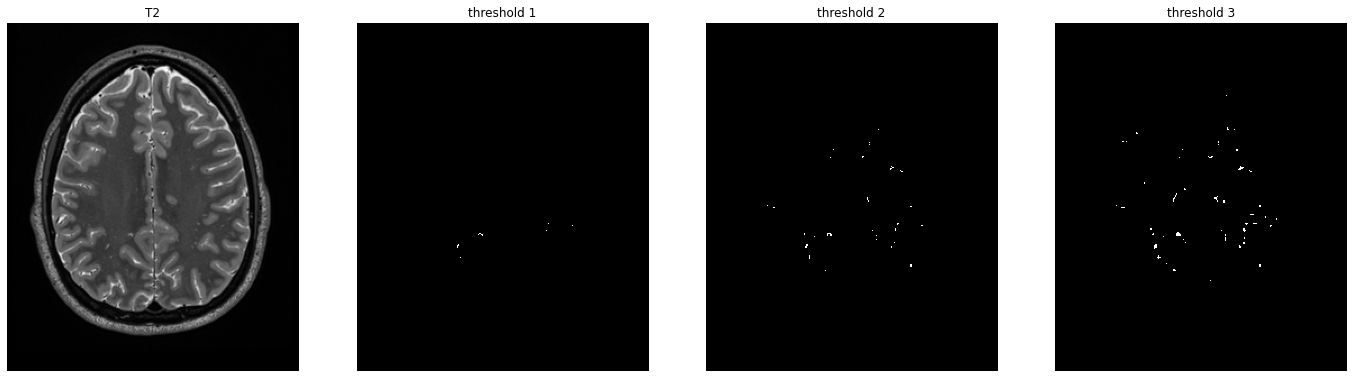

In [7]:
n=145
pvs_th = 0.25
plt.figure(figsize=(24,18))
plt.subplot(141)
plt.imshow(np.rot90(t2d[:,:,n]),cmap='gray')
plt.title('T2')
plt.axis('off')
plt.subplot(142)
plt.imshow(np.rot90(pvsd[:,:,n]>pvs_th*2),cmap='gray',interpolation='nearest')
plt.title('threshold 1')
plt.axis('off')
plt.subplot(143)
plt.imshow(np.rot90(pvsd[:,:,n]>pvs_th),cmap='gray',interpolation='nearest')
plt.axis('off')
plt.title('threshold 2')
plt.subplot(144)
plt.imshow(np.rot90(pvsd[:,:,n]>pvs_th*(1/2)),cmap='gray',interpolation='nearest')
plt.axis('off')
plt.title('threshold 3')
plt.show()


### Save the filtered mask

In [8]:
h = nib.Nifti1Image(pvsmsk,t2.affine,t2.header)
nib.save(h,'../data/3D_T2_pvs_step0.nii.gz')